 统计学基础：描述性统计分析

 描述性统计分析（Description Statistics）是通过图表或数学方法，对数据资料进行整理、分析，并对数据的分布状态、数字特征和随机变量之间的关系进行估计和描述的方法。描述性统计分析分为集中趋势分析和离中趋势分析和相关分析三大部分。

集中趋势分析主要靠平均数、中数、众数等统计指标来表示数据的集中趋势。例如测试班级的平均成绩是多少?是正偏分布还是负偏分布?

离中趋势分析主要靠全距、四分差、平均差、方差、标准差等统计指标来研究数据的离中趋势。
例如，当我们想知道两个教学班的语文成绩，哪个班级的成绩分布更分散时，就可以用两个班级的四分差或百分点来比较。

相关分析是研究现象之间是否存在某种依存关系，并对具体有依存关系的现象进行其相关方向及相关程度的研究。这种关系既包括两个数据之间的单一相关关系—一如年龄与个人领域空间之间的关系，也包括多个数据之间的多重相关关系—一如年龄、抑郁症发生率和个人领域空间之间的关系；既包括A大B就大（小），A小B就小（大）的直线相关关系，也可以是复杂相关关系（A=Y-B·X）；既可以是A、B变量同时增大的正相关关系，也可以是A变量增大时B变量减小的负相关关系，还包括两变量共同变化的紧密程度——相关系数。实际上，相关关系唯一不研究的数据关系，就是数据协同变化的内在根据——因果关系。获得相关系数有什么用呢?简而言之，有了相关系数，就可以根据回归方程，进行A变量到B变量的估算，这就是所谓的回归分析。因此相关分析是一种完整的统计研究方法，它贯穿于提出假设、数据分析、数据研究的始终。

# 集中趋势分析

集中趋势在统计学中是指一组数据向某一中心值靠拢的程度，它反映了一组数据中心点的位置所在。集中趋势测度就是寻找数据水平的代表值或中心值。在数据量大的情况下，就需要有一些确切的指标来表明其整体状态。这些指标最常见的就是平均数、中位数和众数。

其实提到用python来进行描述性统计分析，第一反应就是用：dataframe.describe()
我们不妨用一组数据来展示

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 读取数据
df = pd.read_csv('sanguo_data.csv',header = 0,encoding="utf-8")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'sanguo_data.csv'

In [3]:
#描述性分析
df.describe()

,统御,武力,智力,政治,魅力,寿命
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,58.478000,56.016000,58.784000,56.470000,59.918000,48.930000
std,22.644537,25.303285,21.895391,23.043853,19.698308,13.256567
min,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,47.000000,34.000000,42.000000,39.000000,48.750000,39.000000
50%,65.000000,65.000000,66.000000,62.000000,64.000000,48.000000
75%,75.000000,74.000000,75.000000,76.000000,74.000000,59.000000
max,98.000000,100.000000,100.000000,98.000000,99.000000,94.000000


上图可以看到最大值、最小值、平均数、标准差、中位数等基本的描述性统计指标都有，但是为了更加深地掌握知识，下面还是继续用python学习统计学基础：集中趋势分析

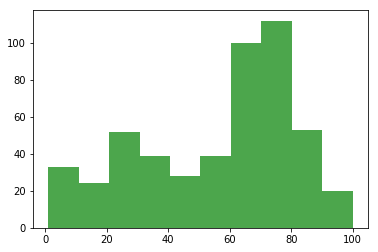

In [4]:
#先看看三国人物的武力值分布
data = df['武力']
plt.hist(data,color = 'g',alpha = 0.7)
plt.show()

平均数分为狭义平均数和广义平均数.狭义平均数指的是简单算数平均数,也就是将数据集中所有数值相加后再除以数值个数得到的结果.广义平均数指除了简单算数平均数之外,还包括加权平均数和几何平均数.

In [5]:
#简单算数平均数，这里没什么好说的
np.average(data)

56.016

In [6]:
#加权平均数，应用最广泛
#这里举个栗子：武力值高不代表带领军队时的战力，不然关羽岂不是无敌，这时候用统御能力加权平均更合适。
np.average(data,weights=df['统御'])

63.89907315571668

In [7]:
#几何平均数，多用于流程转化中的平均，比如多步骤的转化率求平均值
pow(np.prod(data),1/len(data)) 

0.0

In [8]:
#众数
#但是，由于索引值是从0开始的，所以这种求众数的方法只能用在非负数据集
counts = np.bincount(data)
np.argmax(counts)

71

In [9]:
#中位数
np.median(data)

65.0

In [10]:
# 求出数据集nums的四分位数
np.percentile(data, (25, 50, 75), interpolation='midpoint')

array([34., 65., 74.])

箱线图是分位数的直接应用：
主要包含六个数据节点，将一组数据从大到小排列，分别计算出他的上边缘，上四分位数Q3，中位数，下四分位数Q1，下边缘，还有一个异常值。

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://t.cn/Ail1ciOa")

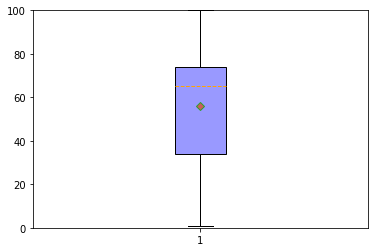

In [12]:
plt.boxplot(
    x=data,#指定绘图数据
    patch_artist=True,#要求用自定义颜色填充盒型图，默认白色填充
    showmeans=True,#以点的形式显示均值
    boxprops={'color':'black','facecolor':'#9999ff'},#设置箱体属性，填充色和边框色
    flierprops={'marker':'o','markerfacecolor':'red','color':'black'},#设置异常值属性，点的形状、填充颜色和边框色
    meanprops={'marker':'D','markerfacecolor':'indianred'},#设置均值点的属性，点的颜色和形状
    medianprops={"linestyle":'--','color':'orange'}#设置中位数线的属性，线的类型和颜色
)
plt.ylim(0,100) #设置y轴的范围
plt.show()

我平时喜欢用的小提琴图（violin plot）用于显示数据分布及其概率密度。它结合了箱形图和密度图的特征，主要用来显示数据的分布形状。中间的黑色粗条表示四分位数范围，从其延伸的幼细黑线代表 95% 置信区间，而白点则为中位数。

In [13]:
Image(url= "http://t.cn/Ail1fqkI")

# 离中趋势

In [14]:
# 求nums的极差
np.max(df['武力'])-np.min(df['武力'])

99

In [15]:
lower_q=np.quantile(df['武力'],0.25,interpolation='lower')#下四分位数
higher_q=np.quantile(df['武力'],0.75,interpolation='higher')#上四分位数
int_r=higher_q-lower_q#四分位距
int_r

40

In [16]:
# 求nums的标准差
np.std(df['武力'])

25.277969538710988

In [17]:
# 求nums的方差
np.var(df['武力'])

638.9757440000005

In [18]:
df_wei = df.loc[(df['国家'] == '魏国')]
df_shu = df.loc[(df['国家'] == '蜀国')]
df_wu = df.loc[(df['国家'] == '吴国')]
df_wu.head()

,姓名,性别,统御,武力,智力,政治,魅力,寿命,国家
4,于诠,男,64,76,40,39,67,54,吴国
28,王忠,男,39,57,21,27,49,62,吴国
30,王惇,男,60,66,46,61,56,58,吴国
41,贾华,男,49,65,41,29,52,48,吴国
92,阚泽,男,43,49,83,86,73,61,吴国


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


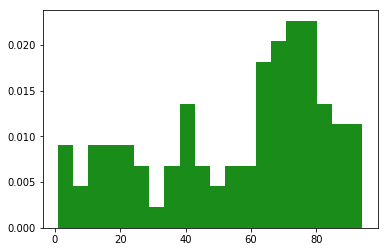

In [19]:
#data =  list(np.random.randn(10000))
data = df_wu['武力']
plt.hist(data,20,normed=True,facecolor='g',alpha=0.9)
plt.show()

In [20]:
#均值、标准差、偏度、峰度
from scipy import stats

#x = np.random.randn(10000)
x = df_wu['武力']
mu = np.mean(x, axis=0)
sigma = np.std(x, axis=0)
skew = stats.skew(x)
kurtosis = stats.kurtosis(x)
print(mu,sigma,skew,kurtosis)

55.62105263157895 26.398635908685417 -0.5813298469212286 -0.9174360144218645


In [21]:
#均值、标准差、偏度、峰度
from scipy import stats
x = df_wei['武力']
mu = np.mean(x, axis=0)
sigma = np.std(x, axis=0)
skew = stats.skew(x)
kurtosis = stats.kurtosis(x)
print(mu,sigma,skew,kurtosis)

52.16326530612245 26.006812507894324 -0.2720621922679012 -1.1456496215579972


In [22]:
#均值、标准差、偏度、峰度
from scipy import stats
x = df_shu['武力']
mu = np.mean(x, axis=0)
sigma = np.std(x, axis=0)
skew = stats.skew(x)
kurtosis = stats.kurtosis(x)
print(mu,sigma,skew,kurtosis)

58.23478260869565 26.28483789589752 -0.6541067772548188 -0.7548158873619144


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


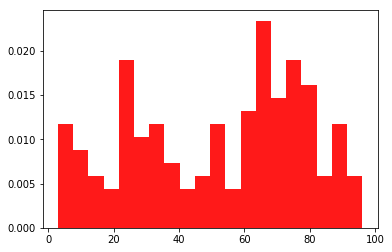

In [23]:
data = df_wei['武力']
plt.hist(data,20,normed=True,facecolor='r',alpha=0.9)

plt.show()

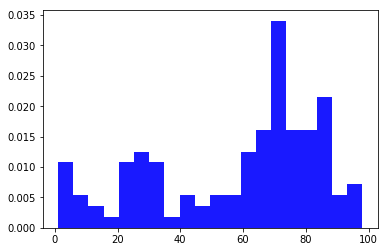

In [24]:
data = df_shu['武力']
plt.hist(data,20,normed=True,facecolor='b',alpha=0.9)

plt.show()

1.从平均值看，蜀国武将的平均武力在三个国家之上

2.从标准差看，吴>蜀>魏，这说明吴国人物间武力差距较大，而魏国人物武力分布比较均匀。

3.从偏度上看：三国偏态系数均小于0，平均数在众数之左，是一种左偏的分布，又称为负偏。
从上面三个图中也可以看出：其中蜀国的武力分布众数偏在右侧更明显一点，长尾拖在左边。
从峰度上看：三国偏态系数均小于0，均是低峰态，相对来说蜀国人物武力分布较另外两国人物武将武力分布更窄一些。


In [25]:
#在实际应用中，通常将峰度值做减3处理，使得正态分布的峰度0，因此，在使用统计软件进行计算时，应注意该软件默认的峰度值计算公式。如Eviews默认的正态分布峰度为3。